# CNN 기초

## 참고 자료
http://research.sualab.com/introduction/2017/10/10/what-is-deep-learning-1.html<br>
https://excelsior-cjh.tistory.com/180<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

from IPython.display import Image

# 완전 연결 신경망(fully-connected neural network or layer)
- **다층 퍼셉트론**을 지칭하는 또 다른 용어입니다. 다만 여러 구조의 심층 신경망이 추가로 발표되면서 기존의 다층 퍼셉트론이라는 표현을 사용하기 다소 애매해졌고, 이에 따라 오늘날에는 완전 연결 신경망이라는 표현을 널리 사용하고 있습니다.

- 서로 같은 층에 위치한 노드 간에는 연결 관계가 존재하지 않으며, 바로 인접한 층에 위치한 노드들 간에만 연결 관계가 존재한다는 것이 핵심적인 특징입니다.

<문제점><br>
***완전 연결 신경망의 문제점은 데이터의 형상이 무시된다는 것이다.***<br> 
입력 데이터가 다차원의 형상일 때, 완전 연결 계층에 입력해주기 위해서는 이 다차원 데이터를 1차원으로 평탄화해준 후에 입력하여야만 한다.

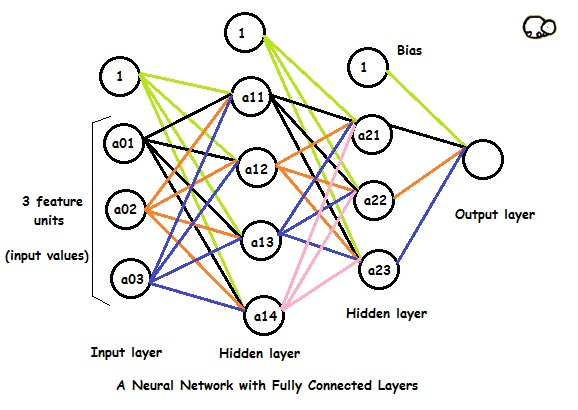

In [9]:
Image("https://iq.opengenus.org/content/images/2019/03/fc.jpg",width=700)

# 합성곱 계층
 - 완전 연결 신경망과는 다르게, 합성곱 신경망(CNN) 계층은 형상을 유지한다. 즉, 이미지와 같은 3차원 데이터를 입력 받으면 다음 계층에도 3차원 데이터로 전달한다. 따라서 합성곱 신경망에서는 이미지처럼 형상을 가진 데이터를 제대로 이해할 수 있는 것이다.

 - 합성곱 신경망(CNN)에서 합성곱 계층(Convolutional Layer)의 입출력 데이터는 다차원이기에 이것을 특징 맵(Feature Map)이라고 한다. 입력 데이터를 입력 특징 맵(Input Feature Map), 출력 데이터를 출력 특징 맵(Output Feature Map)이라고 한다. 

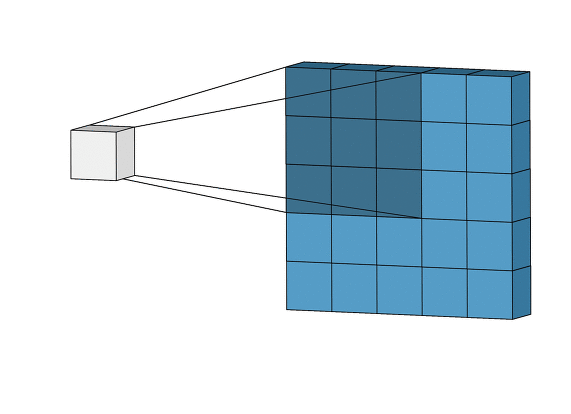

In [11]:
Image("https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F9989933E5BC97E652B564A",format="png")

## 패딩 (padding)
패딩(Padding)은 합성곱 연산을 수행하기 전, 입력데이터 **주변을 특정값으로 채워 늘리는 것**을 말한다. <br> 
패딩(Padding)은 주로 **출력데이터의 공간적(Spatial)크기를 조절**하기 위해 사용한다. <br> 
패딩을 할 때 **채울 값은 hyper-paramete**r로 어떤 값을 채울지 결정할 수 있지만, **주로 zero-padding을 사용**한다. <br> 

**<사용하는 이유>**<br> 
패딩을 사용하는 이유는 패딩을 사용하지 않을 경우, 데이터의 Spatial 크기는 Conv Layer를 지날 때 마다 작아지게 되므로,<br> 
가장자리의 정보들이 사라지는 문제가 발생하기 때문에 패딩을 사용하며, 주로 합성곱 계층의 출력이 입력 데이터의 공간적 크기와 동일하게 맞춰주기 위해 사용한다.



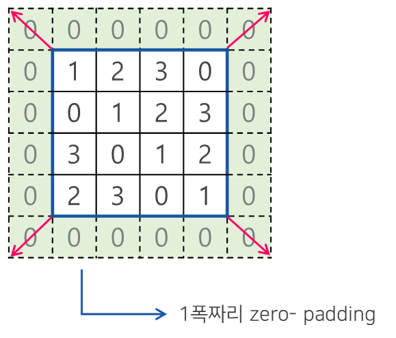

In [13]:
Image("https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile22.uf.tistory.com%2Fimage%2F9916C23F5BC97EEE31EF65",format="png")

## 3차원 데이터의 합성곱
3개의 채널을 가지는 이미지의 다음과 같이 합성곱 연산을 수행할 수 있는데, <br>
여기서 주의해야할 점은 **합성곱 연산을 수행할 때, 입력 데이터의 채널 수와 필터의 채널수가 같아야 한다**.



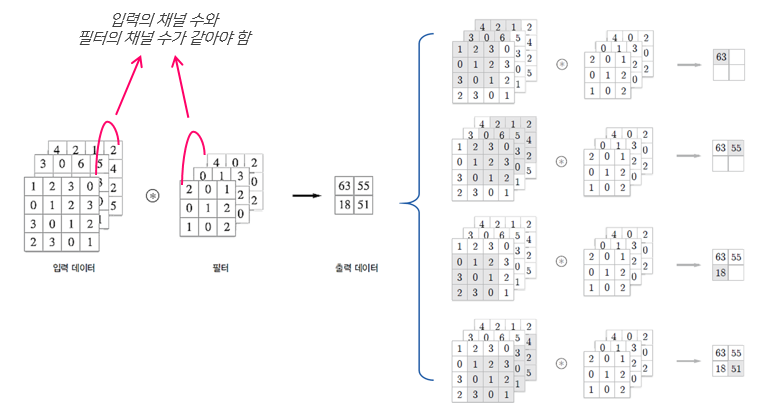

In [14]:
Image("https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile4.uf.tistory.com%2Fimage%2F99C185405BC97F4D1EE8D1",format="png")

# tensorflow로 구현

In [18]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [19]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

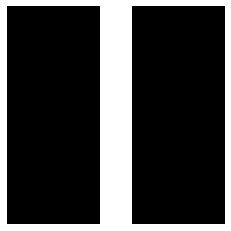

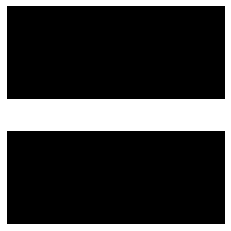

In [21]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()

In [77]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china,flower],dtype=np.float32)
batch_size, height, width, channels = dataset.shape
print(china.shape)

(427, 640, 3)


In [78]:
filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32)
print(filters.shape)

(7, 7, 3, 2)


In [79]:
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1 

In [80]:
print(dataset.shape)

(2, 427, 640, 3)


In [107]:
X = tf.placeholder(tf.float32,shape=[None,height,width,channels])
convolution = tf.nn.conv2d(X,filters,strides=[1,2,2,1],padding="SAME")

In [108]:
filters.shape

(7, 7, 3, 2)

In [109]:
with tf.Session() as sess:
    output = sess.run(convolution,feed_dict={X:dataset})

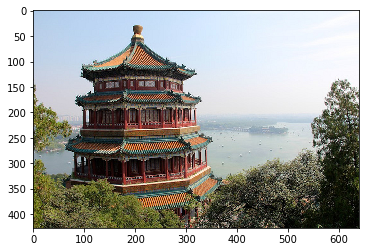

In [110]:
plt.imshow(china)
plt.show()

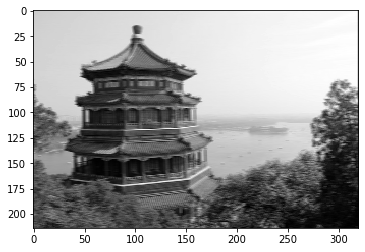

In [111]:
plt.imshow(output[0,:,:,1],cmap="gray")
plt.show()

In [112]:
print(output.shape)

(2, 214, 320, 2)


In [114]:
max_pool = tf.nn.max_pool(X,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool,feed_dict={X:dataset})

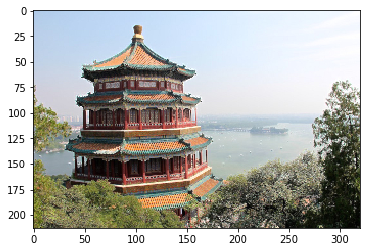

In [118]:
plt.imshow(output[0].astype(np.uint8))

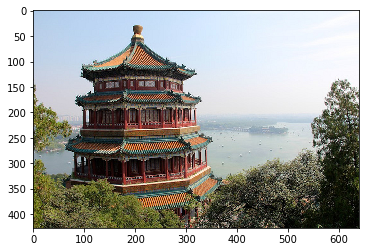

In [119]:
plt.imshow(china)

## 풀링층(Pooling Layer)
- 종류 
    - MaxPooling
    - AveragePooling
    
### 풀링을 사용하는 이유는 기술적인 이유와 이론적인 이유가 있다. 
- 기술적인 이유는 차례로 처리되는 데이터의 크기를 줄여 계산량과 메모리 사용량 그리고 (결과적으로 과대적합의 위험을 줄여주는) 파라미터 수를 줄이준다. 
- 이론적인 이유는 입력 이미지의 크기를 줄이면 이미지가 약간 이동해도 신경망이 이미지 내의 위치에 대한 변화에 영항을 덜 받기 때문이다.
![](https://github.com/ExcelsiorCJH/Hands-On-ML/raw/eea2a029ec626854a972c24230de9053e1ece4af/Chap13-Convolutional_Neural_Networks/images/pooling02.png)
- 하지만 이미지의 회전이나 심한 변동은 완전히 해결 되지는 않았다.
### tensorflow로 구현해 보기

In [45]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [51]:
train_image = cv2.imread("/Users/changmin.kim/Desktop/jupyterNotebook/Hands_on_Machine_Learning/datasets/trian_image.jpg")
train_image = cv2.cvtColor(train_image,cv2.COLOR_BGR2RGB)

In [56]:
train_image_channel = tf.reshape(train_image,[1,350, 300, 3])
for i in range(3):
    train_image_channel = tf.nn.max_pool(train_image_channel,[1,3,3,1],[1,2,2,1],"SAME")
    print(train_image_channel)
    
    
image = sess.run(train_image_channel)
train_image_channel = image.reshape(image.shape[1],image.shape[2],3)

Tensor("MaxPool_25:0", shape=(1, 175, 150, 3), dtype=uint8)
Tensor("MaxPool_26:0", shape=(1, 88, 75, 3), dtype=uint8)
Tensor("MaxPool_27:0", shape=(1, 44, 38, 3), dtype=uint8)


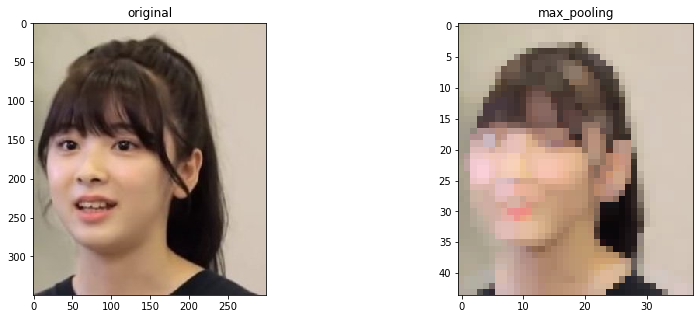

origingal 자투리 부분:  길이 270
max_pooling 자투리 부분 길이 -212


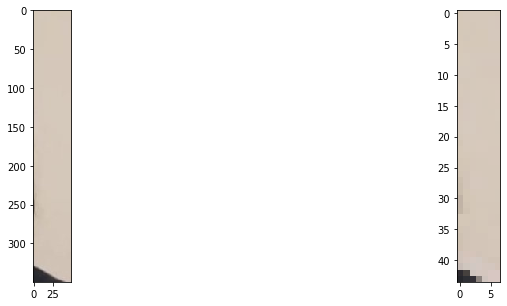

In [57]:
fig, axs = plt.subplots(1,2,figsize=(14,5))
axs[0].imshow(train_image)
axs[0].set_title("original")
axs[1].imshow(s)
axs[1].set_title("max_pooling")
plt.show()
print("origingal 자투리 부분: ","길이",train_image.shape[1]-30)
print("max_pooling 자투리 부분","길이",train_image_channel.shape[1]-250)
fig, axs = plt.subplots(1,2,figsize=(14,5))
axs[0].imshow(train_image[:,250:-1,:])
axs[1].imshow(s[:,30:-1,:])
plt.show()

- 하지만 이미지의 회전이나 심한 변동은 완전히 해결 되지는 않았다.
## 해결 방안
- 다양한 방식으로 변형한 이미지를 학습 데이터로 활용하는 방법(**data augmentation**)을 사용한다. 하지만 대신 학습 시간이 증가하는 단점이 있다.
![](http://t1.kakaocdn.net/braincloud/homepage/article_image/201803220723178568416.png)

- CNN 강화판 CapsNet 캡슐넷을 이용하는 것이다.


## Data Augmentation
Data Augmentation 이란, 이름 해석에서도 알 수 있듯이 데이터를 확장시키는 것을 의미한다. 데이터 분류를 위해 모델을 학습시킬 때, 매우 많은 양의 데이터가 필요하다. (만약, 데이터가 적으면 과적합(overfitting) 문제에 직면할 수 있다.) 그러나 대게 "데이터 수집"은 상당히 많은 비용이 드는 작업이며, 경우에 따라 데이터가 매우 부족한 경우도 있다. 이러한 문제를 해결하기 위한 기술이 Data Augmentation 이다.

- 방법
    - flip(좌우 반전)
    - crop(자르기)
    - rotate(회전)
    - shift(이동)
    - brightness(밝기)
    - contrast(대비)
    - size(크기)

In [59]:
import tensorflow.image as tfImage

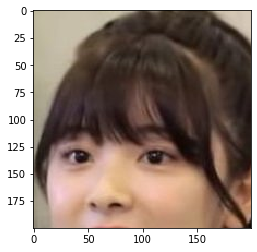

In [81]:
plt.imshow(sess.run(tfImage.random_crop(train_image,[200,200,3])))

In [99]:
import scipy.ndimage as ndi
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [100]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0307 17:03:12.839533 4636392896 deprecation.py:323] From <ipython-input-100-a839aeb82f4b>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0307 17:03:12.840435 4636392896 deprecation.py:323] From /Users/changmin.kim/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0307 17:03:12.841769 4636392896 deprecation.py:323] From /Users/changmin.kim/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is depre

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0307 17:03:14.748248 4636392896 deprecation.py:323] From /Users/changmin.kim/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0307 17:03:14.750882 4636392896 deprecation.py:323] From /Users/changmin.kim/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0307 17:03:15.591944 4636392896 deprecation.py:323] From /Users/changmin.kim/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [105]:
x,y = mnist.train.next_batch(100)

In [112]:
x1 = x[1]

In [113]:
x1 = x1.reshape(28,28)

In [87]:
np.diag([1,1])

array([[1, 0],
       [0, 1]])

In [136]:
hrg = 0.2
wrg = 0.3
h,w = x1.shape[0], x1.shape[1]
tx = np.random.uniform(-hrg,hrg)*h
ty = np.random.uniform(-wrg,wrg)*w
c_in = 0.5*np.array(x1.shape)
c_out = [c_in[0]+tx,c_in[1]+ty]
offset = c_in - c_out

In [137]:
offset

array([-4.31926692, -3.3074398 ])

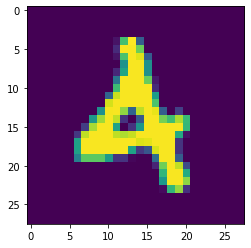

In [138]:
plt.imshow(x1)

In [139]:
out = (ndi.interpolation.affine_transform(x1,np.diag([1,1]),order=2,offset=offset,output=np.float32,mode="nearest"))

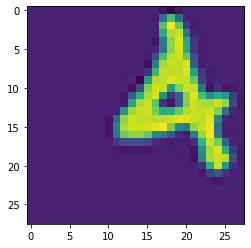

In [135]:
plt.imshow(out)